# Import packages

In [57]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Read metadata from NOAA OISST v2.1 from ERDDAP

In [58]:
#url = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap/ncdcOisst21Agg'
#url = 'https://www.ncei.noaa.gov/erddap/griddap/ncdc_oisst_v2_avhrr_by_time_zlev_lat_lon'
#url = 'https://155.206.139.160/erddap/griddap/noaa_psl_2d74_d418_a6fb'
#url = "https://coastwatch.pfeg.noaa.gov/erddap/griddap/jplMURSST41"
url = 'https://comet.nefsc.noaa.gov/erddap/griddap/noaa_psl_2d74_d418_a6fb' # Sea Surface Tempearture, NOAA/NCEI Optimum Interpolation SST (OISST) AVHRR-only Analysis (V2.1), Global 0.25°, Monthly 1981-present
ds = xr.open_dataset(url)
print(f"Size in GB: {ds.nbytes / 1e9:.2f} GB")
ds.sizes
ds

Size in GB: 2.19 GB


<xarray.Dataset> Size: 2GB
Dimensions:    (time: 527, latitude: 720, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2025-07-01
  * latitude   (latitude) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 6kB 0.125 0.375 0.625 ... 359.4 359.6 359.9
Data variables:
    sst        (time, latitude, longitude) float32 2GB ...
Attributes: (12/35)
    cdm_data_type:              Grid
    comment:                    Reynolds, et al.(2007) Daily High-Resolution-...
    Conventions:                CF-1.10, COARDS, ACDD-1.3
    creator_name:               NOAA/National Centers for Environmental Infor...
    creator_type:               group
    creator_url:                https://www.noaa.gov/
    ...                         ...
    testOutOfDate:              now-114days
    time_coverage_end:          2025-07-01T00:00:00Z
    time_coverage_start:        1981-09-01T00:00:00Z
    title:                      Satellite Sea Surface Tempearture | NOAA/NCEI...
    version:                    Version 2.1
    Westernmost_Easting:        0.125

In [59]:
# rename ds
ds1 = ds

## Change longitudes to -180 to +180 so that you can plot across the prime meridian

### Plot one time slice to confirm that longitudes have been converted

See https://docs.xarray.dev/en/stable/generated/xarray.Dataset.assign_coords.html

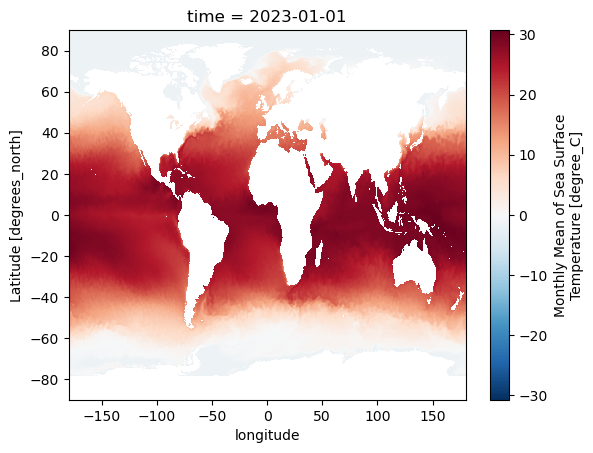

In [60]:
ds2 = ds1.assign_coords(longitude = ((ds1.longitude + 180) % 360) - 180)
ds2 = ds2.sortby('longitude') # don't forget to sort!!
ds2['sst'].sel(time = "2023-01").plot()

## Set lat/lon boundaries, colormap, dates, deployment sites

In [61]:
colormap = 'RdBu_r'

date_range = ("1982-01-01", "2024-12-01")

lat_min = -10
lat_max = 20
lon_min = -30
lon_max = 15

#create smaller box for the local region
lat_min_sm = 12.6
lat_max_sm = 16.6
lon_min_sm = -19.6
lon_max_sm = -15.6

#input deployment locations
#site 1 deployment 1
deployment0101_lat = 14.616
deployment0101_lon = -17.631

#site 1, deployment 2
deployment0102_lat =14.615
deployment0102_lon =-17.630

#site 1, deployment 3
deployment0103_lat = 14.618
deployment0103_lon = -17.628

#site 1, deployment 4
deployment0104_lat = 14.618
deployment0104_lon = -17.628

#site 2, deployments 1 & 2
deployment020102_lat = 14.742
deployment020102_lon = -17.636

#region around recorders
rec_lat_min = 12 
rec_lat_max = 17
rec_lon_min = -20
rec_lon_max = -12

#CVI coords
CVI_lat_min = 14
CVI_lat_max = 18
CVI_lon_min = -27
CVI_lon_max = -21

#GoG Gulf of Guinea
GoG_lat_min = -10
GoG_lat_max = 7
GoG_lon_min = 6
GoG_lon_max = 15

## To reduce size & time, create spatial subset dataset

In [62]:
LATITUDE_MIN = lat_min
LATITUDE_MAX = lat_max
LONGITUDE_MIN = lon_min
LONGITUDE_MAX = lon_max

ds_bigbox = ds2['sst'].sel(latitude=slice(LATITUDE_MIN, LATITUDE_MAX), 
                longitude=slice(LONGITUDE_MIN, LONGITUDE_MAX))
ds_bigbox

<xarray.DataArray 'sst' (time: 527, latitude: 120, longitude: 180)> Size: 46MB
[11383200 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2025-07-01
  * latitude   (latitude) float32 480B -9.875 -9.625 -9.375 ... 19.62 19.88
  * longitude  (longitude) float32 720B -29.88 -29.62 -29.38 ... 14.62 14.88
Attributes: (12/13)
    actual_range:     [-1.8  32.14]
    colorBarMaximum:  32.0
    colorBarMinimum:  0.0
    ioos_category:    Temperature
    level_desc:       Surface
    long_name:        Monthly Mean of Sea Surface Temperature
    ...               ...
    precision:        2.0
    standard_name:    sea_surface_temperature
    statistic:        Monthly Mean
    units:            degree_C
    valid_range:      [-3. 45.]
    var_desc:         Sea Surface Temperature

In [63]:
LATITUDE_MIN = GoG_lat_min
LATITUDE_MAX = GoG_lat_max
LONGITUDE_MIN = GoG_lon_min
LONGITUDE_MAX = GoG_lon_max

ds_gog = ds2['sst'].sel(latitude=slice(LATITUDE_MIN, LATITUDE_MAX), 
                longitude=slice(LONGITUDE_MIN, LONGITUDE_MAX))
ds_gog

<xarray.DataArray 'sst' (time: 527, latitude: 68, longitude: 36)> Size: 5MB
[1290096 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2025-07-01
  * latitude   (latitude) float32 272B -9.875 -9.625 -9.375 ... 6.625 6.875
  * longitude  (longitude) float32 144B 6.125 6.375 6.625 ... 14.38 14.62 14.88
Attributes: (12/13)
    actual_range:     [-1.8  32.14]
    colorBarMaximum:  32.0
    colorBarMinimum:  0.0
    ioos_category:    Temperature
    level_desc:       Surface
    long_name:        Monthly Mean of Sea Surface Temperature
    ...               ...
    precision:        2.0
    standard_name:    sea_surface_temperature
    statistic:        Monthly Mean
    units:            degree_C
    valid_range:      [-3. 45.]
    var_desc:         Sea Surface Temperature

In [64]:
LATITUDE_MIN = CVI_lat_min
LATITUDE_MAX = CVI_lat_max
LONGITUDE_MIN = CVI_lon_min
LONGITUDE_MAX = CVI_lon_max

ds_cvi = ds2['sst'].sel(latitude=slice(LATITUDE_MIN, LATITUDE_MAX), 
                longitude=slice(LONGITUDE_MIN, LONGITUDE_MAX))
ds_cvi

<xarray.DataArray 'sst' (time: 527, latitude: 16, longitude: 24)> Size: 809kB
[202368 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2025-07-01
  * latitude   (latitude) float32 64B 14.12 14.38 14.62 ... 17.38 17.62 17.88
  * longitude  (longitude) float32 96B -26.88 -26.62 -26.38 ... -21.38 -21.12
Attributes: (12/13)
    actual_range:     [-1.8  32.14]
    colorBarMaximum:  32.0
    colorBarMinimum:  0.0
    ioos_category:    Temperature
    level_desc:       Surface
    long_name:        Monthly Mean of Sea Surface Temperature
    ...               ...
    precision:        2.0
    standard_name:    sea_surface_temperature
    statistic:        Monthly Mean
    units:            degree_C
    valid_range:      [-3. 45.]
    var_desc:         Sea Surface Temperature

In [65]:
LATITUDE_MIN = rec_lat_min
LATITUDE_MAX = rec_lat_max
LONGITUDE_MIN = rec_lon_min
LONGITUDE_MAX = rec_lon_max

ds_rec = ds2['sst'].sel(latitude=slice(LATITUDE_MIN, LATITUDE_MAX), 
                longitude=slice(LONGITUDE_MIN, LONGITUDE_MAX))
ds_rec

<xarray.DataArray 'sst' (time: 527, latitude: 20, longitude: 32)> Size: 1MB
[337280 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2025-07-01
  * latitude   (latitude) float32 80B 12.12 12.38 12.62 ... 16.38 16.62 16.88
  * longitude  (longitude) float32 128B -19.88 -19.62 -19.38 ... -12.38 -12.12
Attributes: (12/13)
    actual_range:     [-1.8  32.14]
    colorBarMaximum:  32.0
    colorBarMinimum:  0.0
    ioos_category:    Temperature
    level_desc:       Surface
    long_name:        Monthly Mean of Sea Surface Temperature
    ...               ...
    precision:        2.0
    standard_name:    sea_surface_temperature
    statistic:        Monthly Mean
    units:            degree_C
    valid_range:      [-3. 45.]
    var_desc:         Sea Surface Temperature

## Visualize the subset regions

Text(0.5, 1.0, 'GoG')

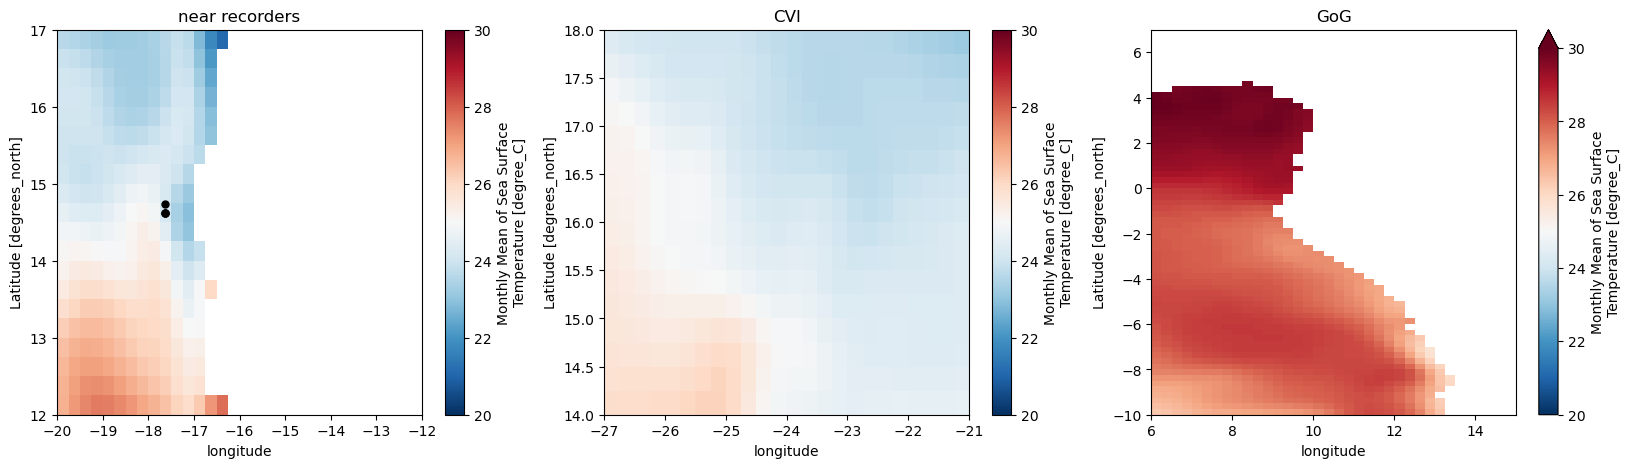

In [66]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

#ds_bigbox.sel(time = "2023-05").plot(ax = axs[0], cmap = colormap, vmin = 20, vmax = 30)
#axs[0].set_title('Large Region')

ds_rec.sel(time = "2023-05").plot(ax = axs[0], cmap = colormap, vmin = 20, vmax = 30)
axs[0].plot(deployment0101_lon, deployment0101_lat, marker='o', color='k', markersize=5)
axs[0].plot(deployment0102_lon, deployment0102_lat, marker='o', color='k', markersize=5)
axs[0].plot(deployment0103_lon, deployment0103_lat, marker='o', color='k', markersize=5)
axs[0].plot(deployment020102_lon, deployment020102_lat, marker='o', color='k', markersize=5)
axs[0].set_title('near recorders')

ds_cvi.sel(time = "2023-05").plot(ax = axs[1], cmap = colormap, vmin = 20, vmax = 30)
axs[1].set_title('CVI')

ds_gog.sel(time = "2023-05").plot(ax = axs[2], cmap = colormap, vmin = 20, vmax = 30)
axs[2].set_title('GoG')

## Compute spatialy explicit monthly climatology 'clim_spat'

In [67]:
clim_spat = ds_bigbox.groupby("time.month").mean("time")
clim_spat_rec = ds_rec.groupby("time.month").mean("time")
clim_spat_cvi = ds_cvi.groupby("time.month").mean("time")
clim_spat_gog = ds_gog.groupby("time.month").mean("time")

clim_spat

<xarray.DataArray 'sst' (month: 12, latitude: 120, longitude: 180)> Size: 1MB
array([[[27.328438, 27.299288, 27.264082, ...,       nan,       nan,
               nan],
        [27.354177, 27.32662 , 27.291334, ...,       nan,       nan,
               nan],
        [27.374075, 27.34684 , 27.314676, ...,       nan,       nan,
               nan],
        ...,
        [23.309383, 23.265087, 23.21885 , ...,       nan,       nan,
               nan],
        [23.275974, 23.231773, 23.191135, ...,       nan,       nan,
               nan],
        [23.242126, 23.197405, 23.161282, ...,       nan,       nan,
               nan]],

       [[27.717182, 27.688046, 27.65805 , ...,       nan,       nan,
               nan],
        [27.742317, 27.712202, 27.682135, ...,       nan,       nan,
               nan],
        [27.767902, 27.735264, 27.702871, ...,       nan,       nan,
               nan],
...
        [25.66788 , 25.63912 , 25.618484, ...,       nan,       nan,
               nan],
        [25.626226, 25.600712, 25.579636, ...,       nan,       nan,
               nan],
        [25.58984 , 25.565083, 25.541   , ...,       nan,       nan,
               nan]],

       [[26.917711, 26.885094, 26.85074 , ...,       nan,       nan,
               nan],
        [26.940233, 26.906084, 26.87129 , ...,       nan,       nan,
               nan],
        [26.959084, 26.926025, 26.892668, ...,       nan,       nan,
               nan],
        ...,
        [24.533226, 24.507185, 24.471987, ...,       nan,       nan,
               nan],
        [24.496311, 24.46827 , 24.432682, ...,       nan,       nan,
               nan],
        [24.4645  , 24.433592, 24.394955, ...,       nan,       nan,
               nan]]], shape=(12, 120, 180), dtype=float32)
Coordinates:
  * latitude   (latitude) float32 480B -9.875 -9.625 -9.375 ... 19.62 19.88
  * longitude  (longitude) float32 720B -29.88 -29.62 -29.38 ... 14.62 14.88
  * month      (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes: (12/13)
    actual_range:     [-1.8  32.14]
    colorBarMaximum:  32.0
    colorBarMinimum:  0.0
    ioos_category:    Temperature
    level_desc:       Surface
    long_name:        Monthly Mean of Sea Surface Temperature
    ...               ...
    precision:        2.0
    standard_name:    sea_surface_temperature
    statistic:        Monthly Mean
    units:            degree_C
    valid_range:      [-3. 45.]
    var_desc:         Sea Surface Temperature

## From clim_spat, compute monthly SST anomalies for all months 1982-2024

In [68]:
anom_spat = ds_bigbox.groupby("time.month") - clim_spat
anom_spat_rec = ds_rec.groupby("time.month") - clim_spat_rec
anom_spat_cvi = ds_cvi.groupby("time.month") - clim_spat_cvi
anom_spat_gog = ds_gog.groupby("time.month") - clim_spat_gog

anom_spat

<xarray.DataArray 'sst' (time: 527, latitude: 120, longitude: 180)> Size: 46MB
array([[[-4.38106537e-01, -3.92122269e-01, -3.35779190e-01, ...,
                     nan,             nan,             nan],
        [-4.31764603e-01, -4.15521622e-01, -3.85362625e-01, ...,
                     nan,             nan,             nan],
        [-4.11605835e-01, -4.17272568e-01, -3.96461487e-01, ...,
                     nan,             nan,             nan],
        ...,
        [-4.47643280e-01, -4.25432205e-01, -3.63491058e-01, ...,
                     nan,             nan,             nan],
        [-4.83461380e-01, -4.73932266e-01, -4.28174973e-01, ...,
                     nan,             nan,             nan],
        [-4.35478210e-01, -4.52234268e-01, -4.35840607e-01, ...,
                     nan,             nan,             nan]],

       [[-2.58445740e-01, -2.72148132e-01, -2.78415680e-01, ...,
                     nan,             nan,             nan],
        [-2.98774719e-01, -2.87124634e-01, -2.59582520e-01, ...,
                     nan,             nan,             nan],
        [-3.10115814e-01, -2.88593292e-01, -2.44091034e-01, ...,
                     nan,             nan,             nan],
...
                     nan,             nan,             nan],
        [ 2.65529633e-01,  2.74417877e-01,  2.61688232e-01, ...,
                     nan,             nan,             nan],
        [ 2.37440109e-01,  2.66849518e-01,  2.79827118e-01, ...,
                     nan,             nan,             nan]],

       [[ 5.10938644e-01,  4.79633331e-01,  4.56890106e-01, ...,
                     nan,             nan,             nan],
        [ 4.89355087e-01,  4.52653885e-01,  4.23740387e-01, ...,
                     nan,             nan,             nan],
        [ 4.40843582e-01,  4.07478333e-01,  3.83079529e-01, ...,
                     nan,             nan,             nan],
        ...,
        [ 4.02235031e-01,  4.24934387e-01,  4.62865829e-01, ...,
                     nan,             nan,             nan],
        [ 4.64244843e-01,  4.90543365e-01,  5.16590118e-01, ...,
                     nan,             nan,             nan],
        [ 5.07894516e-01,  5.41584015e-01,  5.78138351e-01, ...,
                     nan,             nan,             nan]]],
      shape=(527, 120, 180), dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2025-07-01
  * latitude   (latitude) float32 480B -9.875 -9.625 -9.375 ... 19.62 19.88
  * longitude  (longitude) float32 720B -29.88 -29.62 -29.38 ... 14.62 14.88
    month      (time) int64 4kB 9 10 11 12 1 2 3 4 5 6 ... 11 12 1 2 3 4 5 6 7

## Timeseries of monthly climatological temperatures in deg C

### Note coolest temperatures in August due to so much southern hemisphere water in our domain

[<Axes: > <Axes: >]


(-2.0, 2.5)

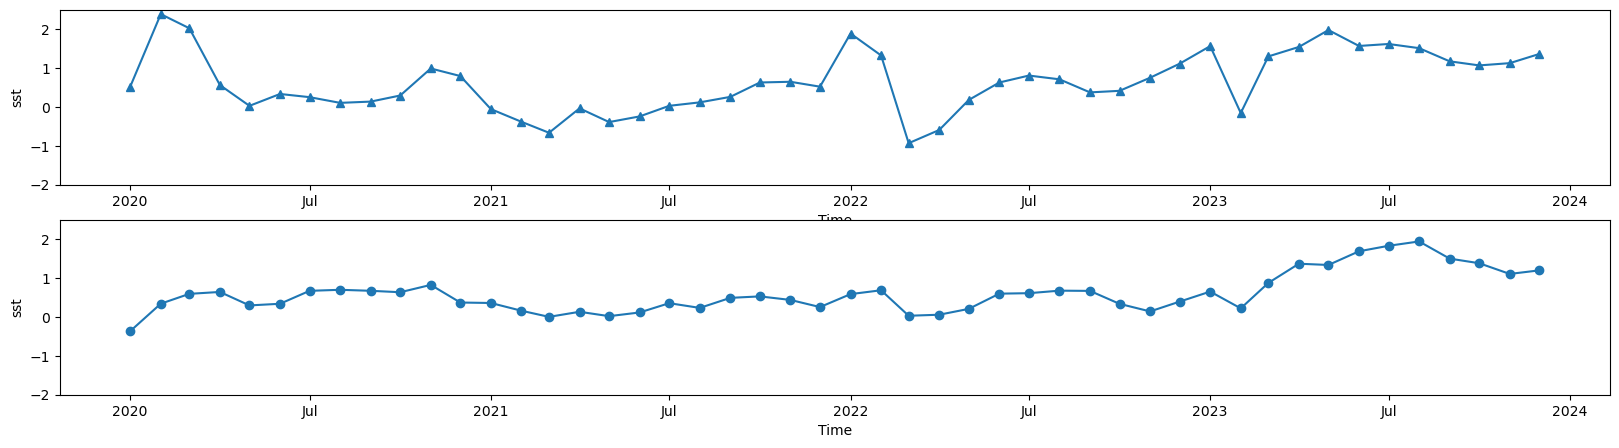

In [78]:
fig, axs = plt.subplots(nrows = 2, figsize=(20, 5))

print(axs)

t1 = "2020-01-01"
t2 = "2023-12-01"
v1 = -2
v2 = 2.5

anom_spat_rec.mean(dim = ['latitude','longitude']).sel(time = slice(t1, t2)).plot(ax=axs[0], marker = "^")
anom_spat_cvi.mean(dim = ['latitude','longitude']).sel(time = slice(t1, t2)).plot(ax=axs[1], marker = "o")
axs[0].set_ylim(v1,v2)
axs[1].set_ylim(v1,v2)


[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

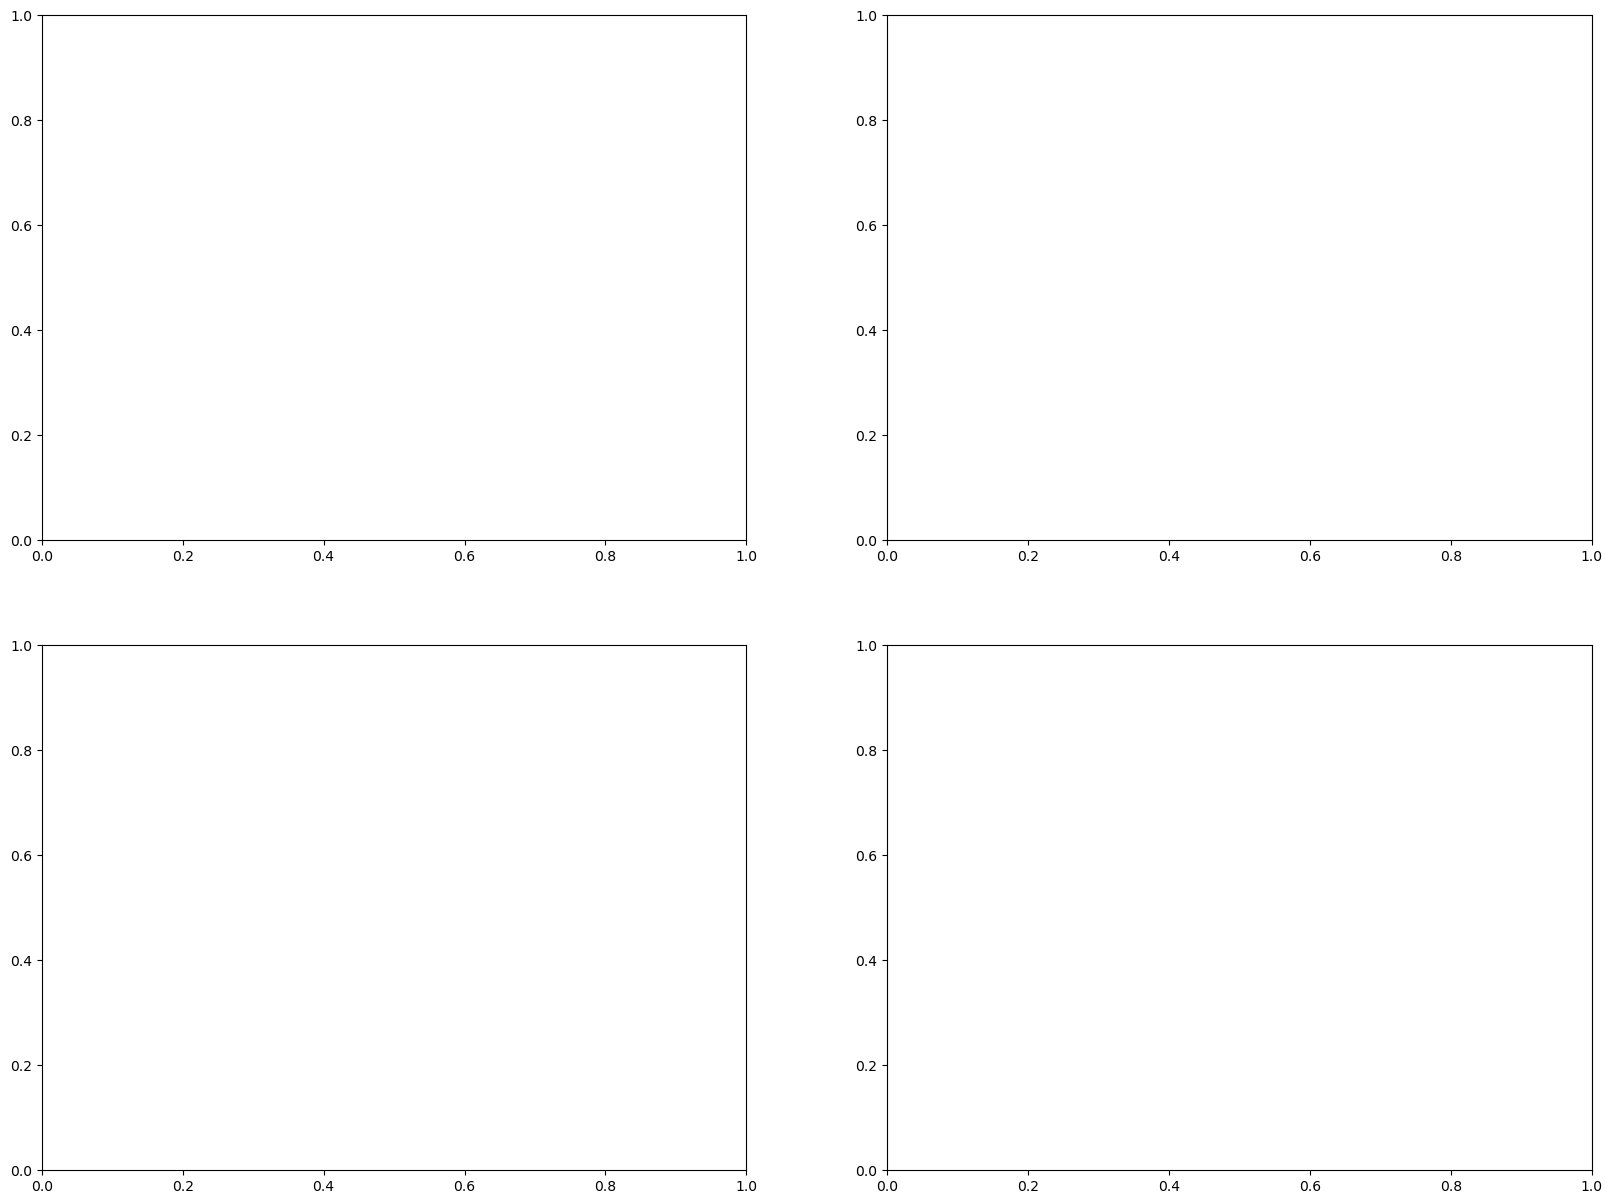

In [72]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 15))

print(axs)

t1 = "2020-01-01"
t2 = "2023-12-01"
v1 = -2
v2 = 2.5

anom_spat_rec.mean(dim = ['latitude','longitude']).sel(time = slice(t1, t2)).plot(ax=axs[0], marker = "^")
anom_spat_cvi.mean(dim = ['latitude','longitude']).sel(time = slice(t1, t2)).plot(ax=axs[1], marker = "o")

#anom_spat_rec.mean(dim = ['latitude','longitude']).sel(time = slice(t1, t2)).plot(ax=axs[2], marker = "^")
#anom_spat_cvi.mean(dim = ['latitude','longitude']).sel(time = slice(t1, t2)).plot(ax=axs[3], marker = "o")

#axs[0].set_ylim(v1,v2)
#axs[1].set_ylim(v1,v2)

In [74]:
np.array(clim_spat.month)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
# The arguments (1, 3) specify one row and three columns for the subplots.
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# 3. Plot data on each of the three subplots.
# We access each subplot using its index in the `axes` array.

# Plot 1: Sine wave
clim_spat.mean(dim = ['latitude','longitude']).plot(marker = "^", ax = ax[0])
axes[0].plot(x, y1, color='b')
axes[0].set_title('Sine Wave')
axes[0].set_xlabel('x-axis')
axes[0].set_ylabel('y-axis')

# Plot 2: Cosine wave
axes[1].plot(x, y2, color='g')
axes[1].set_title('Cosine Wave')
axes[1].set_xlabel('x-axis')
axes[1].set_ylabel('y-axis')

# Plot 3: Quadratic curve
axes[2].plot(x, y3, color='r')
axes[2].set_title('Quadratic Curve')
axes[2].set_xlabel('x-axis')
axes[2].set_ylabel('y-axis')

# 4. Use `plt.tight_layout()` to automatically adjust subplot parameters
# for a tight layout, preventing titles and labels from overlapping.
plt.tight_layout()

# 5. Display the final figure with all three subplots.
plt.show()

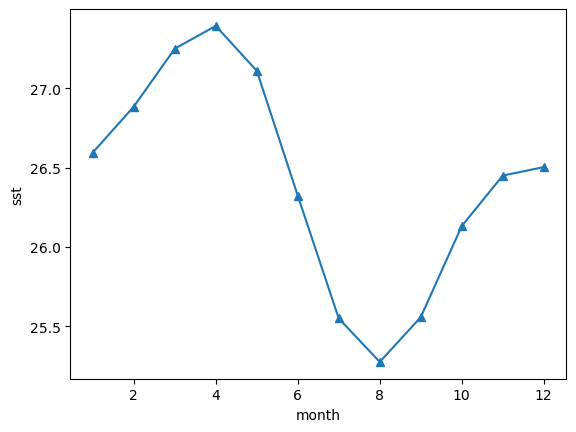

In [32]:
# plot monthly climatology. Note how different this looks due to including southern hemisphere
clim_spat.mean(dim = ['latitude','longitude']).plot(marker = "^")

## Timeseries of temperature in deg C

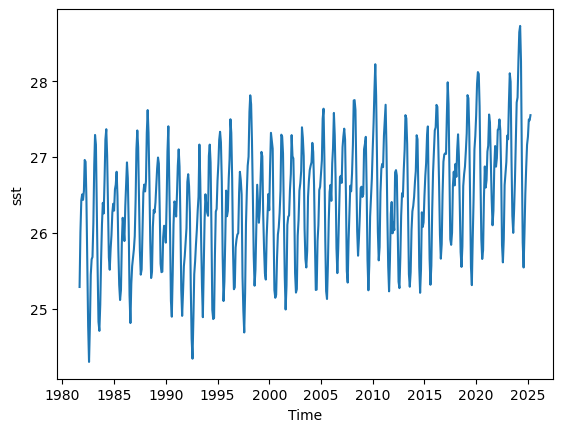

In [33]:
#average over all space against time (monthly means over the domain)
dsBigBox.mean(dim=['latitude', 'longitude']).plot();

## Calculate monthly anomaly means over space, and zero-line to show the mean

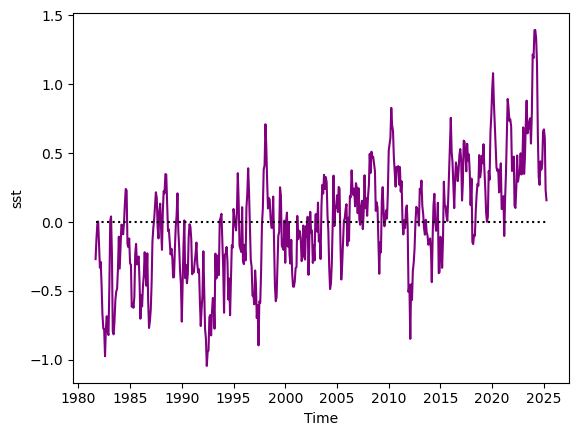

In [34]:
# plot full timeseries of monthly anomalies
month_anom_means = anom_spat.mean(dim = ['latitude','longitude'])
zero_line = month_anom_means*0

fig, ax = plt.subplots()
month_anom_means.plot(color="purple")
zero_line.plot(linestyle = ':', color = "k" )

## (zoom in) Calculate monthly anomaly means over space (2000-06 - 2023-05, and zero-line to show the mean

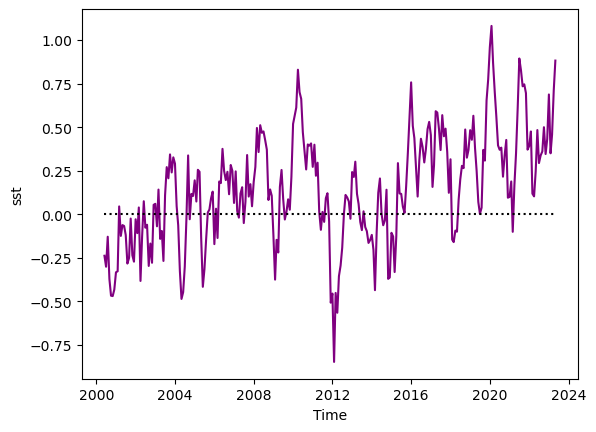

In [35]:
# plot sst anomalies just for the period of time when recorders were deployed
t1 = '2000-06-01'; t2 = '2023-05-01'

fig, ax = plt.subplots()
month_anom_means.sel(time = slice (t1, t2)).plot(color = "purple")
zero_line.sel(time = slice(t1,t2)).plot(color = "black", linestyle = ":")